***Objective***

To build a classification model that can determine whether it will rain in Ontario given certain temperatures. This project is based on the dataset provided by my instructor and may or may not represent the actual weather phenomenon.

***Dataset***

- STATION - Station_id
- NAME - City Name which is Ontario
- Latitude - Latitude of Ontario
- Longitude - Longitude of Ontario
- Elevation - Elevation above sea level
- Date - YYYY-MM-DD Format
- PRCP - Amount of precipitation
- SNWD - Snow Depth
- TAVG - Average Temperature
- TMAX - Maximum Temperature
- TMIN - Minimum Temperature

**Importing the libraries and overview of the dataset**

In [159]:
# Importing libraries for data manipulation
import numpy as np
import pandas as pd

#Importing Data Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

#to scale the data
from sklearn.preprocessing import StandardScaler

#to process sampling
from imblearn.over_sampling import RandomOverSampler
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [160]:
#importing the dataset
df = pd.read_csv('weather.csv')

In [161]:
#checking the dataset
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,2002-06-04,0.19,NaN,NaN,57.0,48.0
1,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,2002-06-05,0.13,NaN,NaN,74.0,52.0
2,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,2002-06-06,0.00,NaN,NaN,64.0,55.0
3,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,2002-06-07,0.00,NaN,NaN,71.0,52.0
4,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,2002-06-08,0.00,NaN,NaN,77.0,53.0


In [162]:
#checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7520 entries, 0 to 7519
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    7520 non-null   object 
 1   NAME       7520 non-null   object 
 2   LATITUDE   7520 non-null   float64
 3   LONGITUDE  7520 non-null   float64
 4   ELEVATION  7520 non-null   float64
 5   DATE       7520 non-null   object 
 6   PRCP       7363 non-null   float64
 7   SNWD       2496 non-null   float64
 8   TAVG       6681 non-null   float64
 9   TMAX       7430 non-null   float64
 10  TMIN       7439 non-null   float64
dtypes: float64(8), object(3)
memory usage: 646.4+ KB


In [163]:
df.shape

(7520, 11)

In [164]:
#Checking basic statistics
df.describe()

,LATITUDE,LONGITUDE,ELEVATION,PRCP,SNWD,TAVG,TMAX,TMIN
count,7.520000e+03,7.520000e+03,7520.0,7363.000000,2496.000000,6681.000000,7430.000000,7439.000000
mean,4.366670e+01,-7.940000e+01,113.0,0.086916,1.802524,49.500524,56.847376,42.932249
std,1.492239e-12,1.125575e-11,0.0,0.219273,2.725113,18.872366,19.711047,17.826439
min,4.366670e+01,-7.940000e+01,113.0,0.000000,0.000000,-18.000000,-3.000000,-13.000000
25%,4.366670e+01,-7.940000e+01,113.0,0.000000,0.000000,35.000000,40.000000,30.000000
50%,4.366670e+01,-7.940000e+01,113.0,0.000000,0.400000,50.000000,57.000000,43.000000
75%,4.366670e+01,-7.940000e+01,113.0,0.055000,2.800000,66.000000,74.000000,59.000000
max,4.366670e+01,-7.940000e+01,113.0,3.810000,14.200000,88.000000,101.000000,79.000000


**Data Cleaning**

In [165]:
#Checking for null values
df.isnull().sum()*100/df.shape[0]

STATION       0.000000
NAME          0.000000
LATITUDE      0.000000
LONGITUDE     0.000000
ELEVATION     0.000000
DATE          0.000000
PRCP          2.087766
SNWD         66.808511
TAVG         11.156915
TMAX          1.196809
TMIN          1.077128
dtype: float64

Observations: There are missing values. We might need to fill it with values depending on what the distribution of the data.

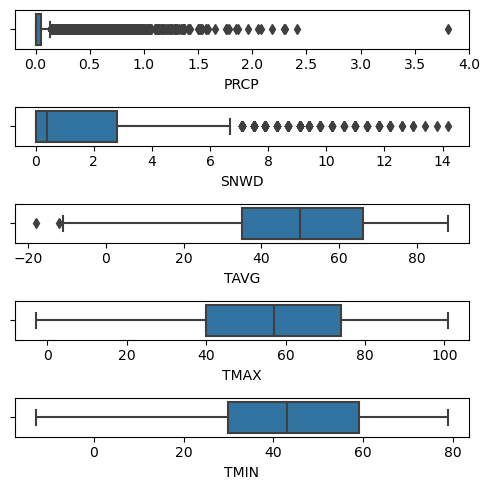

In [166]:
#Checking for Outliers. We can use a box and whisker plot to check.
fig, axs = plt.subplots(5, figsize = (5,5))
plt1 = sns.boxplot(df['PRCP'], ax= axs[0])
plt2 = sns.boxplot(df['SNWD'], ax =axs[1])
plt3 = sns.boxplot(df['TAVG'], ax= axs[2])
plt4 = sns.boxplot(df['TMAX'], ax= axs[3])
plt5 = sns.boxplot(df['TMIN'], ax =axs[4])
plt.tight_layout()

Observation: There are a lot of outliers for the Precipitate and Snow Depth column. For snow depth, if there is no snow, then there is no depth so we will supply the missing values with 0. For the Precipitate, we might need to put in the median in place of the missing values. For TAVG, TAMX, and TMIN, we will put the average in place of missing values.

In [167]:
#lets define the mean and median of the corresponding columns
mean1 = df['TAVG'].mean()
mean2 = df['TMAX'].mean()
mean3 = df['TMIN'].mean()

med = df['PRCP'].median()

In [168]:
#let's fill in the missing values
df['PRCP'].fillna(med, inplace=True)

In [169]:
df['SNWD'].fillna(0, inplace = True)

In [170]:
df['TAVG'].fillna(mean1, inplace = True)

In [171]:
df['TMAX'].fillna(mean2, inplace = True)

In [172]:
df['TMIN'].fillna(mean3, inplace = True)

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7520 entries, 0 to 7519
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    7520 non-null   object 
 1   NAME       7520 non-null   object 
 2   LATITUDE   7520 non-null   float64
 3   LONGITUDE  7520 non-null   float64
 4   ELEVATION  7520 non-null   float64
 5   DATE       7520 non-null   object 
 6   PRCP       7520 non-null   float64
 7   SNWD       7520 non-null   float64
 8   TAVG       7520 non-null   float64
 9   TMAX       7520 non-null   float64
 10  TMIN       7520 non-null   float64
dtypes: float64(8), object(3)
memory usage: 646.4+ KB


Observation: We now have a data with no missing values. Yay!

We are going to add a new column "Rain" which looks up the "PRCP" column. If the value of "PRCP" is greater than 0, that means it's raining. We will then put 1 if its raining and 0 if it's not.

In [174]:
df['Rain'] = df['PRCP'].apply(lambda x:1 if x >0 else 0)

In [175]:
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNWD,TAVG,TMAX,TMIN,Rain
0,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,2002-06-04,0.19,0.0,49.500524,57.0,48.0,1
1,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,2002-06-05,0.13,0.0,49.500524,74.0,52.0,1
2,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,2002-06-06,0.00,0.0,49.500524,64.0,55.0,0
3,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,2002-06-07,0.00,0.0,49.500524,71.0,52.0,0
4,CA006158355,"TORONTO CITY, ON CA",43.6667,-79.4,113.0,2002-06-08,0.00,0.0,49.500524,77.0,53.0,0


In [177]:
#We assign our variables and drop those features that will not be use in the models

X = df.drop(['NAME','STATION','LATITUDE','LONGITUDE','ELEVATION','PRCP', 'DATE'],axis = 1)
y = df[['Rain']]

In [193]:
#Splitting data into training and test set:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test= train_test_split(X, y, test_size = 0.3, random_state = 1)

print(X_train.shape, X_test.shape)

(5264, 5) (2256, 5)


In [179]:
print(len(X_train[X_train['Rain']==1]))
print(len(X_train[X_train['Rain']==0]))

2128
3136


Observation: There seems to be an inbalance between the data.

Let's create a function that will input a dataset and scale it to match the range of the numbers in the dataset. At the same time, it oversamples the data if there is an inbalance.

In [180]:
def scale_dataset(dataframe, oversample =False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y)
    
    data = np.hstack((X, np.reshape(y,(-1,1))))
    
    return data, X, y

In [194]:
#Scaling the training set and test set.
X_train, X_train , y_train = scale_dataset(X_train, oversample = True)
X_test, X_test , y_test = scale_dataset(X_test, oversample = False)

In [195]:
len(y_train)

6272

In [191]:
sum(y_train == 1)

3136

Now, the data is balanced.

# **Building the Models!**

**Model 1: K-Nearest neighbor (kNN)**

In [202]:
#importing the library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [234]:
knn_model = KNeighborsClassifier(n_neighbors = 3)

#fitting the model/Training
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [235]:
#testing the model 
y_pred = knn_model.predict(X_test)

In [236]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.61      0.62      1323
           1       0.46      0.47      0.46       933

    accuracy                           0.55      2256
   macro avg       0.54      0.54      0.54      2256
weighted avg       0.55      0.55      0.55      2256



Things to look at:
- Accuracy - how many target points the model predicted correctly over the total?
- Precision - How many retrieved items are relevant?
- Recall - How many relevant items are retrieved?

In our case, we want to focus more on the accuracy of our model since we want to predict correctly if it will rain or not. The model only has a 55% accuracy so we might need to tweak our parameters or reprocess our data. For now, let's look at other models.

**Model 2: Naive Bayes(NB)  Model**

In [237]:
#importing the library
from sklearn.naive_bayes import GaussianNB

In [238]:
nb_model = GaussianNB()

In [239]:
#Fitting the model/Training
nb_model.fit(X_train,y_train)

GaussianNB()

In [241]:
#predicting using the test set
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.55      0.58      1323
           1       0.45      0.52      0.48       933

    accuracy                           0.54      2256
   macro avg       0.53      0.54      0.53      2256
weighted avg       0.55      0.54      0.54      2256



This one has a 54% accuracy. Not good enough in my opinion. XD

**Model 3: Logistic Regression**

In [242]:
#importing the library
from sklearn.linear_model import LogisticRegression

In [243]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [244]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.58      0.61      1323
           1       0.49      0.57      0.52       933

    accuracy                           0.57      2256
   macro avg       0.57      0.57      0.57      2256
weighted avg       0.58      0.57      0.58      2256



This is the best in terms of accuracy so far. Let's do one more classification model.

**Model 4: Support Vector Machines (SVM)**

In [246]:
from sklearn.svm import SVC #Support Vector Classifier

In [247]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [248]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.54      0.59      1323
           1       0.48      0.59      0.53       933

    accuracy                           0.56      2256
   macro avg       0.56      0.57      0.56      2256
weighted avg       0.58      0.56      0.56      2256



This gave us a 56% accuracy. :(

# Conclusion and Recommendations

**Conclusion**
- Out of the machine learning models that we created, the Logistic Regression model gave us the best results. These models are not the best and could be improved.

**Recommendation**
- We can improve these models by tweaking the hyperparameters of each models. 
- We can also look at other models that might work better than the ones that we created.
- We should also look at the dataset one more time and see how we can clean/process it better.